In [41]:
import json
from scipy import stats
import matplotlib.pyplot as plt
import math
import numpy as np

In [42]:
def fill_between_points(pointa, pointb,n):
    (xmin,ymin) = pointa;
    (xmax,ymax) = pointb;
    return [[xmin + i*(xmax-xmin)/n,ymin + i*(ymax-ymin)/n] for i in range(n)] + [[xmax,ymax]]

In [43]:
#load data

with open('export_sg.geojson') as f:
    data = json.load(f)
    
allcoords = []

for feature in data['features']:
    if feature['geometry']['type'] == "LineString":
        for i in range(len(feature['geometry']['coordinates'])-1):
            allcoords.extend(fill_between_points(feature['geometry']['coordinates'][i],feature['geometry']['coordinates'][i+1],500))

In [44]:
len(allcoords)

19258440

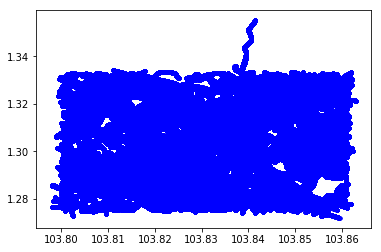

In [45]:
longs = [x[0] for x in allcoords]
lats = [x[1] for x in allcoords]

plt.plot(longs,lats,'b.')
plt.show()

In [46]:


#check if a point is in a rectangle from bottom left point (x,y) with length l

#point: (a,b)
def point_in_box(point,box):
    (a,b) = point
    (x,y,l) = box
    if (a>x) & (a<(x+l)) & (b>y) & (b<(y+l)):
        return True
    else:
        return False
    
def generate_grid(bounds,l):
    points=[]
    
    (xrange,yrange) = bounds
    (xmin,xmax) = xrange
    (ymin,ymax) = yrange
    
    nx = (xmax-xmin)/l;
    ny = (ymax-ymin)/l;
    
    xlocs = np.linspace(xmin,xmax-l,nx);
    ylocs = np.linspace(ymin,ymax-l,ny);
    
    for x in range(len(xlocs)):
        for y in range(len(ylocs)):
            points.append((xlocs[x],ylocs[y],l))
            
    return points

def generate_bin_edges(bounds,l):
    
    (xrange,yrange) = bounds
    (xmin,xmax) = xrange
    (ymin,ymax) = yrange
    
    nx = (xmax-xmin)/l;
    ny = (ymax-ymin)/l;
    
    xlocs = np.linspace(xmin,xmax-l,nx);
    ylocs = np.linspace(ymin,ymax-l,ny);
            
    return (xlocs,ylocs)


#create grid and check each point in the grid:
def grid_count(datapoints,boxpoints):
    N=0;
    for box in boxpoints:
        
        for data in datapoints:
            if point_in_box(data,box):
                N += 1;
                break;
    return N

def get_count(allcoords,l):
    longs = [x[0] for x in allcoords]
    lats  = [x[1] for x in allcoords]
    
    boundlong = (min(longs), max(longs))
    boundlat = (min(lats), max(lats))
    
    grid, _, _ = np.histogram2d(longs, lats,bins=generate_bin_edges((boundlong,boundlat),l))
    return np.count_nonzero(grid)

def get_dimension(scale,counts):
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(scale),np.log(counts))

    dimension = -slope
    print(dimension)

In [47]:
ls = np.logspace(-2,-5.5,20)

counts = [0]*len(ls)

for i in range(len(ls)):
    counts[i] = get_count(allcoords,ls[i])
    print(counts[i])
    

/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/Users/Devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


31
74
207
481
1097
2503
5302
10668
19858
34949
59656
98825
157714
246399
380835
583874
890105
1348456
2024366
3002301


/Users/Devansh/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


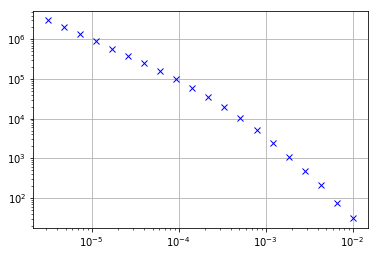

In [48]:
plt.loglog(ls,counts,'bx')
plt.grid("True")
plt.show()

In [49]:
get_dimension(ls,counts)

1.38497406082


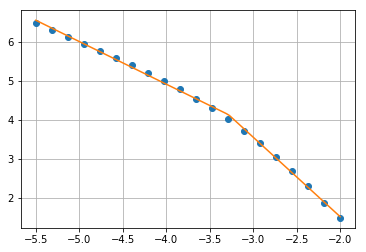

In [50]:
x = np.log10(ls)
y = np.log10(counts)

from scipy import optimize
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x,y,p0=(-2.5,2,-1,-2))
xd = np.linspace(-2, -5.5, 100)
plt.plot(x,y, "o")
plt.grid(True)
plt.plot(xd, piecewise_linear(xd, *p))

In [51]:
p

array([-3.28289888,  4.1300307 , -1.08961378, -2.03221065])